# Notebook for explaining the Treebank dataset model creation

In [1]:
import numpy as np
import tensorflow as tf
import pandas as analytics
import time
import warnings
import os
import matplotlib.pyplot as graph
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
warnings.filterwarnings("ignore")

2024-04-16 13:37:44.903801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 13:37:45.911609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_folder = '../data/'
treebank_training_filename = 'treebank_training.csv'
treebank_testing_filename = 'treebank_testing.csv'

treebank_training_path = os.path.join(data_folder,treebank_training_filename)
treebank_testing_path = os.path.join(data_folder,treebank_testing_filename)

In [3]:
df_train = analytics.read_csv(treebank_training_path)
df_test = analytics.read_csv(treebank_testing_path)
print("Train \n",df_train.head(3))
print("\n\nTest \n",df_test.head(3))

Train 
                                                 data
0  Mr. Dinkins did fail *-1 to file his income ta...
1                      This is not a trivial issue .
2  The new ad plan from Newsweek , a unit of the ...


Test 
                                                 data
0  The action on Poland came as the conference se...
1  He adds that his shares in a company savings p...
2  The Financial Times-Stock Exchange 100-share i...


In [4]:
corpus = []
for i in range(len(df_train)):
    text = df_train.iloc[i]['data']
    corpus.append(text)

In [5]:
# Tokenize the corpus
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df_train['data'])
total_words = len(tokenizer.word_index) + 1
print("Total Number of Words :",total_words)

Total Number of Words : 8893


In [6]:
# Generate input sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [7]:
# Analysis of tokenisation
print("Sentence :",corpus[0])
print("Actual Length of sentence :",len(corpus[0].split()))
print("Removing the noise and irregularities ...")
example = corpus[0].split()
example.remove('*-1')
example.remove('*-2')
example.remove('*T*-3')
example.remove('``')
print("The length of the sentence :",len(example))
print("Length in the tokenised vector :",(len(input_sequences[31])))

Sentence : Mr. Dinkins did fail *-1 to file his income taxes for four years , but he insists 0 he voluntarily admitted the `` oversight '' when he was being considered *-2 for a city job *T*-3 .
Actual Length of sentence : 37
Removing the noise and irregularities ...
The length of the sentence : 33
Length in the tokenised vector : 33


In [8]:
len(input_sequences) # It is so large because it collects the length of all the values right from beginning to be fed into a RNN model.

70905

Text(0.5, 1.0, 'Length of vectors vs Input Sequences')

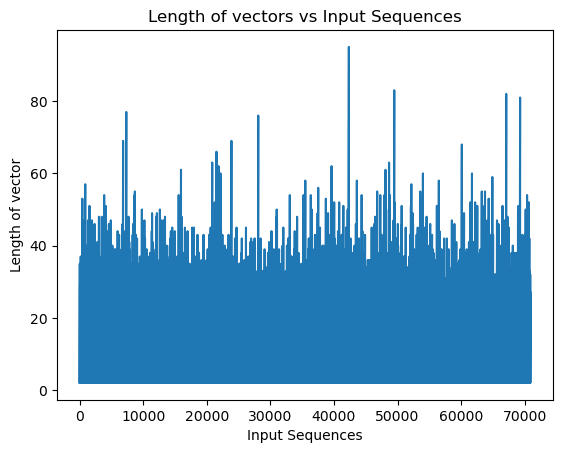

In [9]:
graph.plot([len(x) for x in input_sequences])
graph.ylabel('Length of vector')
graph.xlabel('Input Sequences')
graph.title("Length of vectors vs Input Sequences")
# graph.grid()

Text(0.5, 1.0, 'Length of vectors vs Input Sequences')

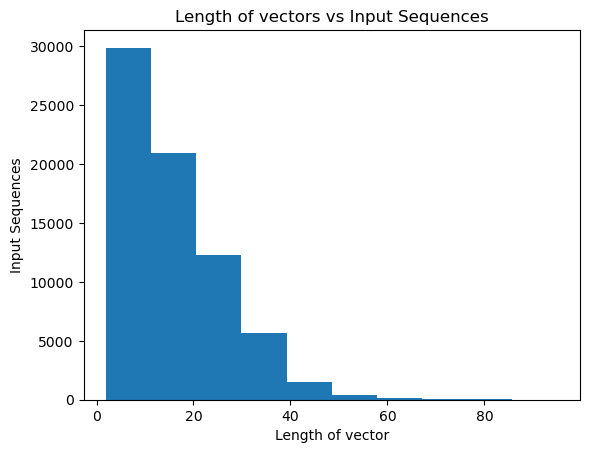

In [10]:
graph.hist([len(x) for x in input_sequences])
graph.xlabel('Length of vector')
graph.ylabel('Input Sequences')
graph.title("Length of vectors vs Input Sequences")
# graph.grid()

In [11]:
# Pad sequences
max_sequence_len = 48
input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and labels
X, y = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [12]:
start_time = time.time()

# Define the model architecture
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(80, dropout = 0.2))
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)
end_time = time.time()

2024-04-16 13:37:49.246573: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 48s 21ms/step - accuracy: 0.0486 - loss: 7.3476
Epoch 2/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.1039 - loss: 6.4990
Epoch 3/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.1413 - loss: 5.9628
Epoch 4/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.1658 - loss: 5.5444
Epoch 5/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.1848 - loss: 5.2054
Epoch 6/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.1994 - loss: 4.9223
Epoch 7/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.2165 - loss: 4.6355
Epoch 8/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.2323 - loss: 4.4109
Epoch 9/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.2584 - loss: 4.1663
Epoch 10/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.2785 - loss: 3.9521
Epoch 11/100
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.3065 - loss: 3.74

In [13]:
time_taken = end_time - start_time 
time_taken = time_taken/60
print("Total Time run : %.2f mins"%time_taken)
print("Max Len :",max_sequence_len)

Total Time run : 78.28 mins
Max Len : 48


In [14]:
model.save("new_trained_model_treebank.keras")

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 47, 100)        │       889,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 80)             │        57,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8893)           │       720,333 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,002,661 (19.08 MB)

 Trainable params: 1,667,553 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,335,108 (12.72 MB)

In [16]:
test_corpus = []
for i in range(len(df_test)):
    text = df_test.iloc[i]['data']
    test_corpus.append(text)

# Generate input sequences
test_input_sequences = []
for line in test_corpus:
    test_token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        test_input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = 50
test_input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(test_input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and labels
test_X, test_y = test_input_sequences[:,:-1],test_input_sequences[:,-1]
test_y = tf.keras.utils.to_categorical(test_y, num_classes=total_words)

In [17]:
loss , accuracy = model.evaluate(test_X, test_y)
print("Loss in testing : %.3f"%loss)
print("Accuracy in testing :%.3f"%accuracy)

637/637 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8461 - loss: 0.6690
Loss in testing : 0.669
Accuracy in testing :0.846
